In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set_style("darkgrid")

In [103]:
file = pd.read_csv("data.csv")
columns = file.columns[8:15]
time_labels = [int(i.split("_")[1]) for i in columns]
time_check = max(time_labels)
print(time_labels)
bottom_limit = .665
top_limit = .71
train, test = train_test_split(file, test_size=0.2, random_state=42)

[0, 995, 4844, 8757, 12635, 16102, 19470]


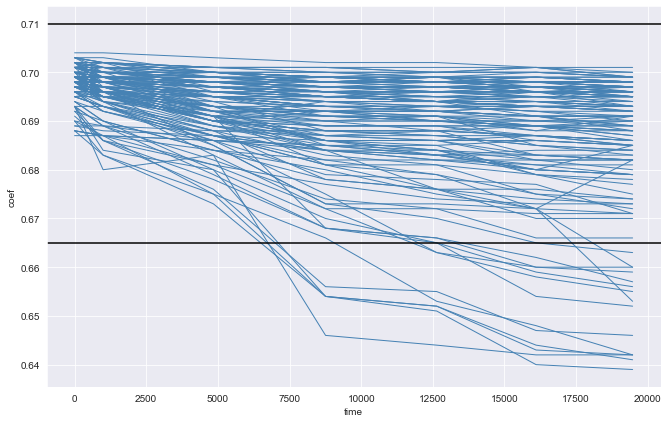

In [104]:
plt.figure(figsize=(11, 7))
for i in range(file.shape[0]):
    data = np.array(file[columns].iloc[i])
    plt.title('')
    plt.xlabel('time')
    plt.ylabel('coef')
    plt.plot(time_labels, data, color='steelblue', linewidth=1)
plt.axhline(y=bottom_limit, xmin=0, xmax=1, color='k', linewidth=1.5)
plt.axhline(y=top_limit, xmin=0, xmax=1, color='k', linewidth=1.5)

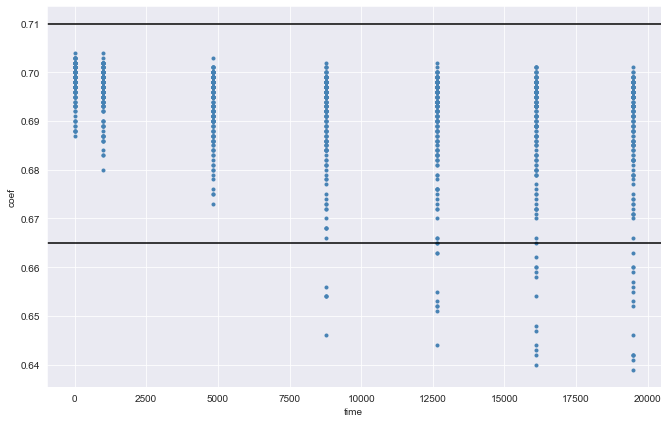

In [105]:
plt.figure(figsize=(11, 7))
for i in range(file.shape[0]):
    data = np.array(file[columns].iloc[i])
    plt.title('')
    plt.xlabel('time')
    plt.ylabel('coef')
    plt.scatter(time_labels, data, color='steelblue', marker=".")
plt.axhline(y=bottom_limit, xmin=0, xmax=1, color='k', linewidth=1.5)
plt.axhline(y=top_limit, xmin=0, xmax=1, color='k', linewidth=1.5)

In [184]:
mean0 = train[columns[0]].mean()
std0 = train[columns[0]].std()

In [211]:
c = []
c_const = 1
for i in columns:
    c.append(np.array(train[i]).min() - c_const)

In [212]:
mean_ln = []
std_ln = []
for i, curr_c in zip(columns, c):
    data = np.array(np.log(train[i] - curr_c))
    mean_ln.append(data.mean())
    std_ln.append(data.std())

In [213]:
b = []
for i in std_ln:
    b.append(1.28255 / i)

In [214]:
a = []
for i, j in zip(b, mean_ln):
    a.append(np.exp(j + 0.577226 / i))

In [215]:
print(c)
print(a)
print(b)

[-0.31200000000000006, -0.31999999999999995, -0.32699999999999996, -0.354, -0.356, -0.36, -0.361]
[1.011640121050902, 1.0183151500280625, 1.022901197600607, 1.0484464099368616, 1.0499678413810556, 1.0533718084821022, 1.053647732546643]
[375.04692782843955, 290.0804739788048, 203.3919110462659, 121.47065112284548, 111.05830879485569, 96.00801127152243, 91.66540009204525]


In [216]:
time_labels = np.array(time_labels)
linear_regression_x = np.array([[i, mean0, std0] for i in time_labels])
print(linear_regression_x)

[[0.00000000e+00 6.98090226e-01 3.46072914e-03]
 [9.95000000e+02 6.98090226e-01 3.46072914e-03]
 [4.84400000e+03 6.98090226e-01 3.46072914e-03]
 [8.75700000e+03 6.98090226e-01 3.46072914e-03]
 [1.26350000e+04 6.98090226e-01 3.46072914e-03]
 [1.61020000e+04 6.98090226e-01 3.46072914e-03]
 [1.94700000e+04 6.98090226e-01 3.46072914e-03]]


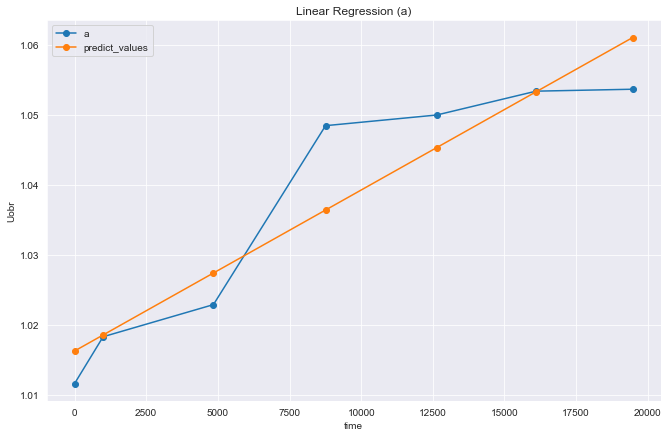

In [217]:
model_a = LinearRegression()
model_a.fit(linear_regression_x, a)
predict_values = model_a.predict(linear_regression_x)
plt.figure(figsize=(11, 7))
plt.title('Linear Regression (a)')
plt.xlabel('time')
plt.ylabel('Uobr')
plt.plot(time_labels, a, label="a", marker="o")
plt.plot(time_labels, predict_values, label="predict_values", marker="o")
plt.legend()


[304.1305866  290.81925657 239.32648341 186.9775041  135.09676253
  88.71446985  43.65662106]


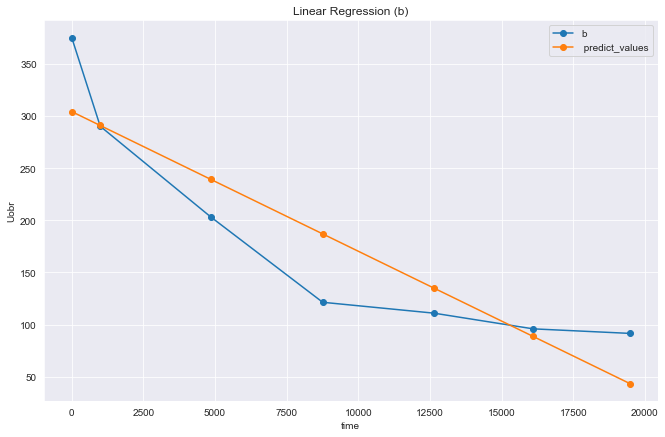

In [218]:
model_b = LinearRegression()
model_b.fit(linear_regression_x, b)
predict_values = model_b.predict(linear_regression_x)
plt.figure(figsize=(11, 7))
plt.title('Linear Regression (b)')
plt.xlabel('time')
plt.ylabel('Uobr')
plt.plot(time_labels, b, label="b", marker="o")
plt.plot(time_labels, predict_values, label=" predict_values", marker="o")
plt.legend()
print(predict_values)

[-0.31782609 -0.32044366 -0.33056932 -0.34086334 -0.35106529 -0.36018601
 -0.36904629]


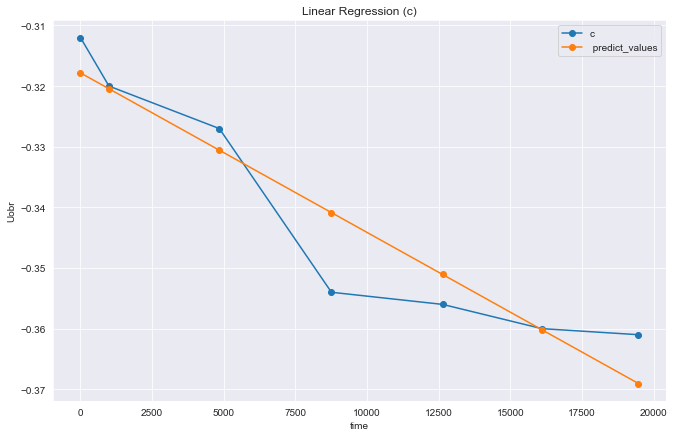

In [219]:
model_c = LinearRegression()
model_c.fit(linear_regression_x, c)
predict_values = model_c.predict(linear_regression_x)
plt.figure(figsize=(11, 7))
plt.title('Linear Regression (c)')
plt.xlabel('time')
plt.ylabel('Uobr')
plt.plot(time_labels, c, label="c", marker="o")
plt.plot(time_labels, predict_values, label=" predict_values", marker="o")
plt.legend()
print(predict_values)

In [230]:
mean0_test = test[columns[0]].mean()
std0_test = test[columns[0]].std()
a_test = []
b_test = []
c_test = []
for i in time_labels:
    a_test.append(i * model_a.coef_[0] + mean0_test * model_a.coef_[1] + std0_test * model_a.coef_[2])
    b_test.append(i * model_b.coef_[0] + mean0_test * model_b.coef_[1] + std0_test * model_b.coef_[2])
    c_test.append(i * model_c.coef_[0] + mean0_test * model_c.coef_[1] + std0_test * model_c.coef_[2])
print(a_test)
print(b_test)
print(c_test)


[3.23741812075336e-42, 0.002286295992414343, 0.0111304701379448, 0.020121702518163215, 0.02903251242628665, 0.036998932733523365, 0.044737872333977136]
[-1.8848977209870633e-38, -13.311330031725493, -64.80410318962642, -117.15308250032176, -169.03382407120765, -215.41611675461698, -260.47396554542246]
[-3.706506904467591e-42, -0.0026175710289681, -0.01274323021539847, -0.023037255779571508, -0.03323920598091652, -0.04235992835019532, -0.05122020897890343]


In [226]:
def cdf(a, b, c, x):
    print(a, b, c, x)
    return 1 - np.exp(-pow((x - c) / a, 1))
    # return 1 - np.exp(-pow((x - c) / a, b))

test_working_predict = []
for a, b, c in zip(a_test, b_test, c_test):
    test_working_predict.append(cdf(a, b, c, top_limit) - cdf(a, b, c, bottom_limit))
# test_working_predict = []
# for i in mean_test:
#     for j in std_test:
#         test_working_predict.append(
#             sps.norm(loc=i, scale=j).cdf(top_limit) - sps.norm(loc=i, scale=j).cdf(bottom_limit))

3.23741812075336e-42 -1.8848977209870633e-38 -3.706506904467591e-42 0.71
3.23741812075336e-42 -1.8848977209870633e-38 -3.706506904467591e-42 0.665
0.002286295992414343 -13.311330031725493 -0.0026175710289681 0.71
0.002286295992414343 -13.311330031725493 -0.0026175710289681 0.665
0.0111304701379448 -64.80410318962642 -0.01274323021539847 0.71
0.0111304701379448 -64.80410318962642 -0.01274323021539847 0.665
0.020121702518163215 -117.15308250032176 -0.023037255779571508 0.71
0.020121702518163215 -117.15308250032176 -0.023037255779571508 0.665
0.02903251242628665 -169.03382407120765 -0.03323920598091652 0.71
0.02903251242628665 -169.03382407120765 -0.03323920598091652 0.665
0.036998932733523365 -215.41611675461698 -0.04235992835019532 0.71
0.036998932733523365 -215.41611675461698 -0.04235992835019532 0.665
0.044737872333977136 -260.47396554542246 -0.05122020897890343 0.71
0.044737872333977136 -260.47396554542246 -0.05122020897890343 0.665


In [227]:
test_working_experiment = []
for i in columns:
    working = 0
    for j in test[i]:
        if j > bottom_limit and j < top_limit:
            working += 1
    test_working_experiment.append(working / test.shape[0])

In [228]:
test_error = 0
for p, e in zip(test_working_predict, test_working_experiment):
    test_error += pow((p - e) / e, 2)
test_error = np.sqrt(test_error / len(test_working_predict))

In [229]:
print(f"Процент рабочих устройств\nВремя: Прогноз (Реальное значение)")
for t, p, e in zip(time_labels, test_working_predict, test_working_experiment):
    print(f"{t}: {p} ({e})")
print(f"Ошибка: {test_error}")

Процент рабочих устройств
Время: Прогноз (Реальное значение)
0: 0.0 (1.0)
995: 0.0 (1.0)
4844: 0.0 (1.0)
8757: 1.3322676295501878e-15 (1.0)
12635: 2.8281155195486463e-11 (0.9705882352941176)
16102: 3.5023001165868095e-09 (0.9705882352941176)
19470: 7.071978203043727e-08 (0.9705882352941176)
Ошибка: 0.9999999890713752


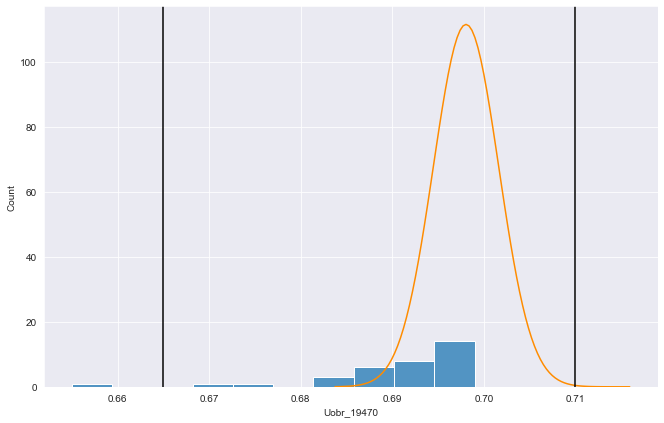

In [154]:
plt.figure(figsize=(11, 7))
sns.histplot(test[columns[6]], bins=10)
x = np.linspace(mean_test[len(mean_test) - 1] - 4 * std_test[len(std_test) - 1], mean_test[len(mean_test) - 1] + 5 * std_test[len(std_test) - 1], 100)
plt.plot(x, sps.norm(loc=mean_test[len(mean_test) - 1], scale=std_test[len(std_test) - 1]).pdf(x), color='darkorange')
plt.axvline(bottom_limit, 0, 1, color='k')
plt.axvline(top_limit, 0, 1, color='k')